### What we often do in this use-case
    High level over-view..
    
   
    Note :->>
    
    We will solve most of those challenges that we often face in real world..
    we will focus primarily on each & every part of data science life-cycle..
    
    
     Life- Cycle of Data Science Project :
        a) Data collection
        b) Perform Data Cleaning / Data Preparation / Data Pre-processing 
        c) Data visuaslisation(EDA)
        d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it..
            III)Feature selection or feature importance
            
        e) build machine leaning model & dump it..
        f) Automate ML Pipeline 
        g) hypertune ml model..along with cross validation

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lets read data !

In [115]:
train_data = pd.read_excel(r"C:\Users\mrkha\OneDrive\Desktop\ML projects\Project 1 (airline ticket fare)\Data_Train.xlsx")
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [116]:
train_data.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# preprocessing starts

In [117]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [118]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [119]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [120]:
train_data.dropna(inplace=True)

In [121]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [122]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

 # converting time data to timestapms object

In [123]:
data = train_data.copy()

In [124]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [125]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [126]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [127]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [128]:
change_into_Datetime('Date_of_Journey')
change_into_Datetime('Dep_Time')
change_into_Datetime('Arrival_Time')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [130]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [131]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-21 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-21 05:50:00,2024-02-21 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-21 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-02-21 18:05:00,2024-02-21 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-02-21 16:50:00,2024-02-21 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [132]:
def extract_hour_minute(data, col):
    data[col + "_hour"] = data[col].dt.hour
    data[col + "minute"] = data[col].dt.hour
    return data.head(3)

In [133]:
extract_hour_minute(data, 'Dep_Time')



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-21 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,22
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-21 05:50:00,2024-02-21 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-21 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,9


In [134]:
extract_hour_minute(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-02-21 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-21 05:50:00,2024-02-21 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,13
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-21 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,9,4,4


In [135]:
col_to_drop = ['Dep_Time', 'Arrival_Time']
data.drop(col_to_drop, axis=1, inplace=True)

In [136]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,1
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,13
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,9,4,4
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,18,23,23
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,16,21,21


# data analysis

In [137]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Timeminute',
       'Arrival_Time_hour', 'Arrival_Timeminute'],
      dtype='object')

In [138]:
def flight_dep_time(x):
    if x > 4 and x<=8:
        return "Early Morning"
    elif x > 8 and x<=12:
        return "Morning"
    elif x > 12 and x<=16:
        return "Noon"
    elif x > 16 and x<=20:
        return "Evening"
    elif x > 20 and x<=24:
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

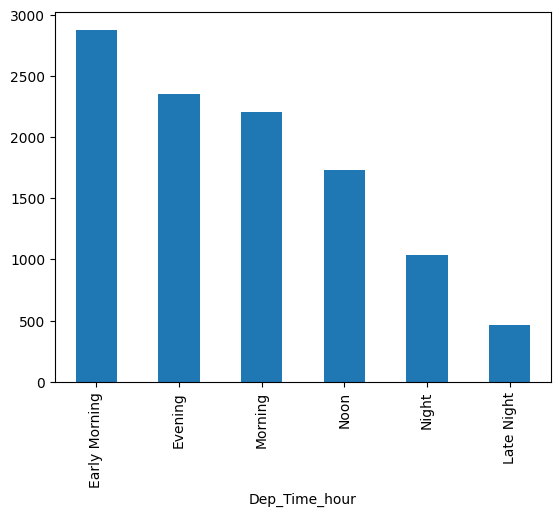

In [139]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [140]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()





In [141]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

# Pre-process Duration Feature & extract meaningful features from it..

In [142]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' + x
    elif 'm' not in x:
        x = x + ' 0m' 
    return x


In [143]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [144]:
data['Duration_hour'] = data['Duration'].apply(func=lambda item:int(item.split(' ')[0][0:-1]))
data['Duration_hour'] 

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hour, Length: 10682, dtype: int64

In [145]:
data['Duration_minute'] = data['Duration'].apply(func=lambda item:int(item.split(' ')[1][0:-1]))
data['Duration_minute']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_minute, Length: 10682, dtype: int64

In [146]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,1,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,13,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,9,4,4,19,0


In [147]:
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

In [148]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)
data['Duration_total_mins'] 

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

In [149]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,1,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,13,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,9,4,4,19,0,1140


# Lets Analyse whether Duration impacts Price or not ?

In [150]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Timeminute',
       'Arrival_Time_hour', 'Arrival_Timeminute', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

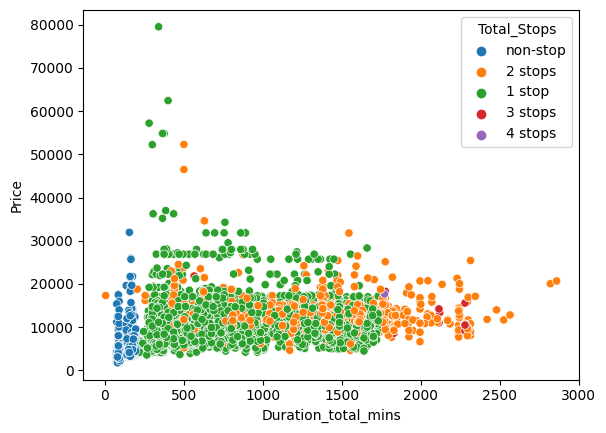

In [151]:
sns.scatterplot(x='Duration_total_mins', y='Price', hue="Total_Stops" ,data=data, )

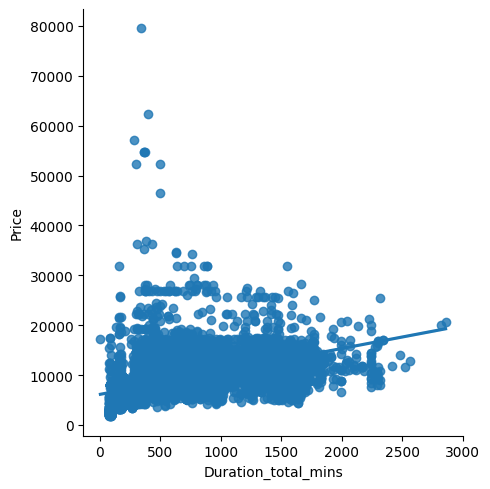

In [152]:
sns.lmplot(x='Duration_total_mins', y='Price',data=data, )

which route Jet Airways is extremely used?

In [153]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Timeminute',
       'Arrival_Time_hour', 'Arrival_Timeminute', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins'],
      dtype='object')

In [154]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

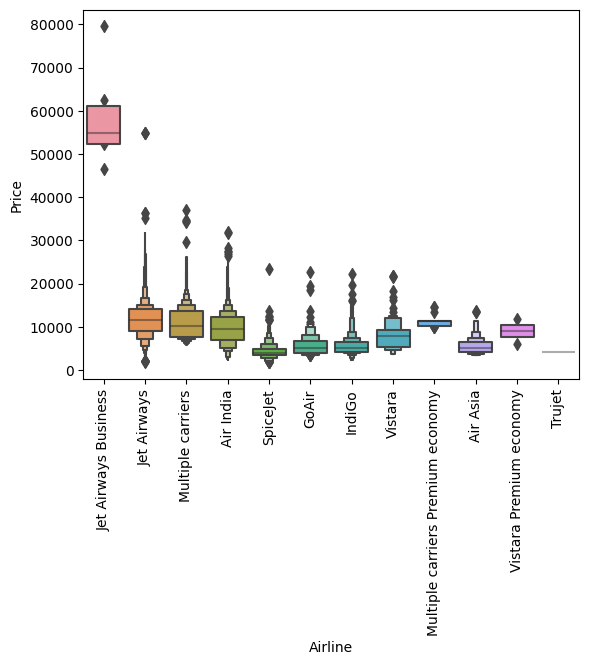

In [155]:
sns.boxenplot(x='Airline', y='Price', data=data.sort_values('Price', ascending=False) )
plt.xticks(rotation= "vertical")
plt.show()

# feature engineering

# take care of catagorical data

In [156]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,1,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,13,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,9,4,4,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,18,23,23,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,16,21,21,4,45,285


In [157]:
categorical = [col for col in data.columns if data[col].dtype == "object"]

In [158]:
categorical

In [159]:
data['Source'].apply(lambda x:1 if x == 'Banglore' else 0)

In [160]:
for sub in data['Source'].unique():
    data["Source_" + sub] = data['Source'].apply(lambda x:1 if x == sub else 0)

In [161]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,1,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,13,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,9,4,4,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,18,23,23,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,16,21,21,4,45,285


# apply one hot encoder dor soure

In [162]:
# from sklearn.preprocessing import OneHotEncoder

# # Initialize OneHotEncoder
# ohe = OneHotEncoder(sparse=False)  # Ensure the output is a dense array

# # Fit and transform the 'Source' column
# encoded_data_sparse = ohe.fit_transform(data[['Source']])

# # Convert the sparse matrix to a dense array
# encoded_data = encoded_data_sparse.toarray()

# # Convert the encoded data into a DataFrame with appropriate column names
# encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Source']))

# # Display the first few rows of the encoded DataFrame to verify
# encoded_df.head()


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [52]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Timeminute,Arrival_Time_hour,Arrival_Timeminute,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,2019-03-24,"(0, 0)\t1.0",New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,22,1,1,2,50,170
1,Air India,2019-05-01,"(0, 3)\t1.0",Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,5,13,13,7,25,445
2,Jet Airways,2019-06-09,"(0, 2)\t1.0",Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,9,4,4,19,0,1140


In [1475]:
data["Airline"]

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

if we apply one hot encoding on this it will add 12 more variable it self which will might lead to "cursse of dimentianlity"

In [1476]:
average_price_per_airline = data.groupby('Airline')['Price'].mean().sort_values().index
average_price_per_airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [1477]:
rank = {key:index for index, key in enumerate(average_price_per_airline, 0)}

rank

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [1478]:
# rank = {}
# for i in range(len(average_price_per_airline)):
#     rank[average_price_per_airline[i]] = i
# rank


In [1479]:
data['Airline'] = data['Airline'].map(rank)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [1480]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [1481]:
data['Destination'].replace('New Delhi', 'Delhi',inplace=True)

In [1482]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [1483]:
average_price_per_Destination = data.groupby('Destination')['Price'].mean().sort_values().index

In [1484]:
average_price_per_Destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [1485]:
dest_rank = {key:index for index, key in enumerate(average_price_per_Destination, 0)}
dest_rank

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [1486]:
data['Destination'] = data['Destination'].map(dest_rank)

In [1487]:
data['Destination'] 

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [1488]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Timeminute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,1,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,13,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,4,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,...,23,23,5,25,325,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,...,21,21,4,45,285,1,0,0,0,0


# convert "total_stops" to oreder representative format

In [1489]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [1490]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops'] = data['Total_Stops'].map(stops)
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

# delete unneccessary columns

 - most of is no info
 - Route is a duplicate of total stops
 - Duration_total_mins and Date_of_Journey are redundant
 - journey year is constant 2019


In [1491]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Timeminute,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,1,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,13,13,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,4,4,19,0,1140,0,0,1,0,0


In [1492]:
data.drop(columns=['Date_of_Journey', 'Route', 'Additional_Info', 'Duration_total_mins', 'Source', 'Journey_year','Duration'], axis=1, inplace=True)

In [1493]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Timeminute', 'Arrival_Time_hour',
       'Arrival_Timeminute', 'Duration_hour', 'Duration_minute',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

# handling outlier

In [1494]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    sns.histplot(df[col], ax=ax1, kde=True)
    sns.boxplot(x=df[col], ax=ax2)
    sns.histplot(df[col], ax=ax3, kde=False)

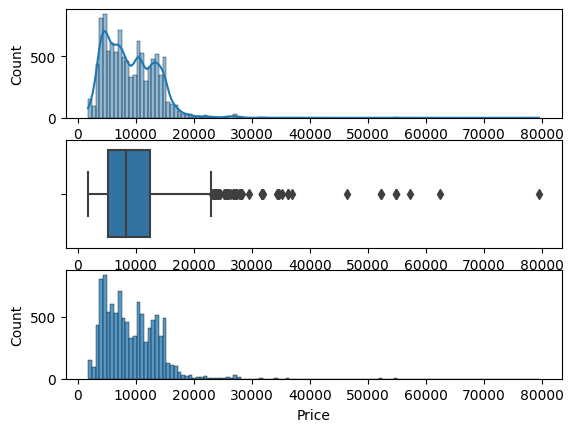

In [1495]:
plot(data, 'Price')

In [1496]:
q3 = data['Price'].quantile(0.75)
q1 = data['Price'].quantile(0.25)
iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [1497]:
outliers = [price for price in data['Price'] if price> maximum or price < minimum]
print(outliers)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [1498]:
data['Price'] = np.where(data['Price']>= 35000, data['Price'].median(), data['Price'])

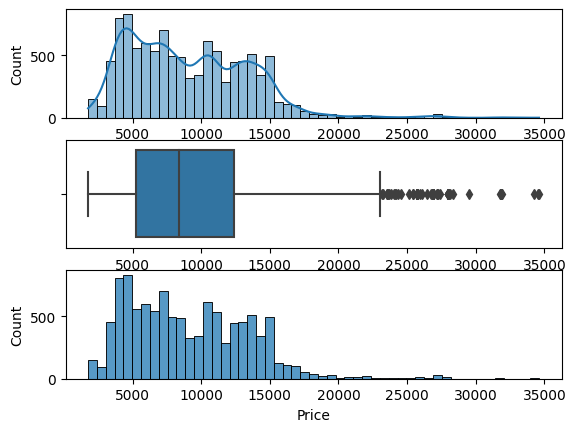

In [1499]:
plot(data, 'Price')

# feature selection

In [1500]:
X = data.drop(['Price'], axis=1)

In [1501]:
y = data['Price']


In [1502]:
from sklearn.feature_selection import mutual_info_regression
imp = mutual_info_regression(X, y)

In [1503]:
imp

array([1.31467943, 1.06944588, 0.80056183, 0.37293732, 0.62029291,
       0.93075722, 0.92336508, 1.13544318, 1.14609757, 0.95572483,
       0.67163731, 0.39744822, 0.45351158, 0.52235927, 0.13805878,
       0.20641306])

In [1504]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [1505]:
imp_df.columns = ['importance']
imp_df

,importance
Airline,1.314679
Destination,1.069446
Total_Stops,0.800562
Journey_day,0.372937
Journey_month,0.620293
Dep_Time_hour,0.930757
Dep_Timeminute,0.923365
Arrival_Time_hour,1.135443
Arrival_Timeminute,1.146098
Duration_hour,0.955725


In [1506]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,1.314679
Arrival_Timeminute,1.146098
Arrival_Time_hour,1.135443
Destination,1.069446
Duration_hour,0.955725
Dep_Time_hour,0.930757
Dep_Timeminute,0.923365
Total_Stops,0.800562
Duration_minute,0.671637
Journey_month,0.620293


# Applying ML models

In [1507]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# applying random forest

In [1508]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

In [1509]:
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [1510]:
y_pred = random_forest.predict(X_test)

In [1511]:
y_pred

array([16820.82 ,  5241.6  ,  8870.11 , ...,  3535.29 ,  6193.535,
        7028.51 ])

In [1512]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.8126474535406305

# save the model

In [1513]:
import pickle 


In [1514]:
file = open(r'C:\Users\mrkha\OneDrive\Desktop\ML projects\Project 1 (airline ticket fare)\Flight_Price_resources\rf.pkl', 'wb')

In [1515]:
pickle.dump(random_forest, file)

In [1516]:
model = open(r'C:\Users\mrkha\OneDrive\Desktop\ML projects\Project 1 (airline ticket fare)\Flight_Price_resources\rf.pkl', 'rb')

In [1517]:
rf = pickle.load(model)

In [1518]:
y_pred2 = rf.predict(X_test)

In [1519]:
metrics.r2_score(y_test , y_pred2)

0.8126474535406305

# create evaluation metrics

In [1520]:
#mean absulute percentage error
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [1521]:
mape(y_test, y_pred)

13.453982390949687

# automation

In [1522]:
from sklearn import metrics

In [1523]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score : {}'.format(model.score(X_train, y_train)))
    y_prediction = ml_model.predict(X_test)
    print('predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_prediction))))
    print('MAPE : {}'.format(mape(y_test , y_prediction)))
    sns.distplot(y_test - y_prediction)


Training score : 0.950395769443797
predictions are : [16753.62        5565.96        8911.6        ...  3466.38
  6367.82333333  6892.89      ]


r2 score : 0.8142362364151476
MAE : 1193.5895934775633
MSE : 3616374.581813516
RMSE : 1901.6767816360161
MAPE : 13.409742617153114


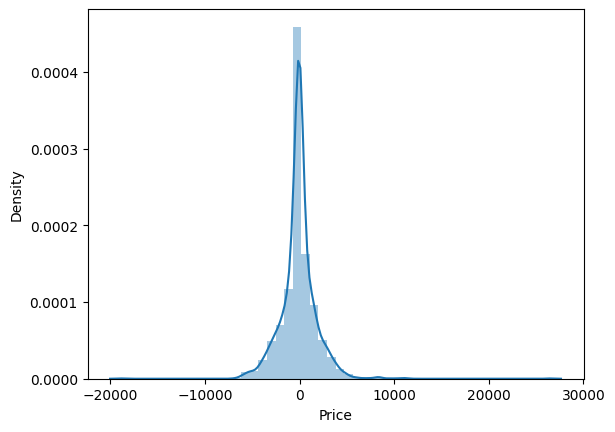

In [1524]:
predict(rf)

In [1525]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9655499962230948
predictions are : [16840.  4959.  9187. ...  3419.  5797.  7514.]


r2 score : 0.722573119685278
MAE : 1362.4694309247473
MSE : 5400835.4423962105
RMSE : 2323.96975935493
MAPE : 15.273790774533383


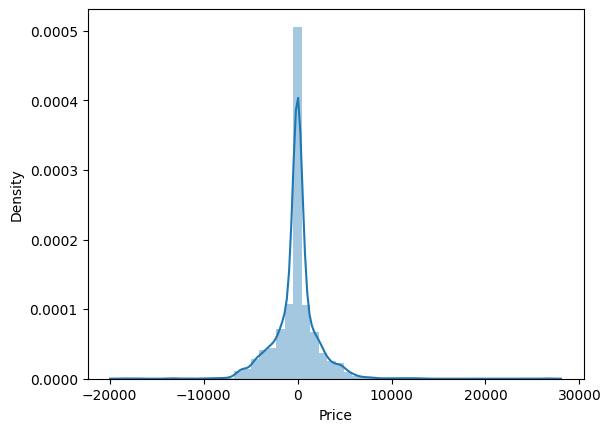

In [1526]:
predict(DecisionTreeRegressor())

# hypertune model

In [1527]:
from sklearn.model_selection import RandomizedSearchCV

In [1528]:
reg_rf = RandomForestRegressor()

In [1529]:
np.linspace(start=100,  stop = 1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [1530]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [1531]:
random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [1532]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [1533]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [1534]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [1535]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5,
                      n_estimators=760)

In [1536]:
rf_random.best_score_

0.7938575114193088